In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.preprocessing.image import load_img, img_to_array


base_dir = '/home/ec2-user/SageMaker/ML-Algorithm-Benchmarks/data/brain_tumor/Training'

2024-09-04 20:16:53.503487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-04 20:16:53.553927: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-04 20:16:53.566786: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-04 20:16:53.648909: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-04 20:16:56.072273: W tensorflow/comp

In [7]:
# Class names based on the directory structure
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Image size (resize the images to a uniform size)
image_size = (128, 128)

# Initialize data and labels
data = []
labels = []

# Load the images, preprocess them, and store their paths
for label in class_names:
    label_dir = os.path.join(base_dir, label)
    for image_file in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_file)
        image = load_img(image_path, target_size=image_size)  # Resize images
        image = img_to_array(image)  # Convert image to numpy array
        image = image.flatten()  # Flatten image to 1D array
        data.append(image)
        labels.append(class_names.index(label))  # Convert label to numeric

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)

In [9]:
# Initialize and train the SVM classifier
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict and evaluate the model on the test set
y_pred = svm.predict(X_test)
print(y_pred)

[1 2 0 1 0 3 2 3 0 0 1 1 2 1 2 3 0 3 0 0 0 3 0 1 3 1 1 3 3 3 0 1 2 1 2 0 0
 0 3 1 0 1 2 0 0 0 2 3 1 0 3 1 1 0 2 1 0 2 1 3 1 1 3 0 0 3 0 3 1 0 3 3 1 2
 3 2 0 0 3 2 3 0 3 0 3 1 3 0 1 1 3 1 3 3 2 3 1 3 1 1 0 0 3 0 3 3 0 3 0 0 0
 3 3 1 0 0 1 1 0 0 3 3 1 0 3 3 2 2 1 3 2 3 3 0 3 0 1 0 0 3 2 1 2 3 0 1 2 2
 1 2 3 1 1 0 1 1 1 3 0 1 1 3 3 1 0 1 3 2 3 0 3 1 1 2 3 1 1 0 0 1 0 0 3 1 0
 2 3 0 0 1 1 0 0 3 2 3 2 3 3 3 1 1 0 1 1 0 2 1 1 1 1 3 3 3 2 3 0 0 1 0 0 0
 3 3 1 0 1 1 2 0 0 1 1 3 0 3 0 0 1 0 1 1 3 1 3 0 0 3 1 0 3 3 1 1 2 3 1 1 0
 3 2 2 0 3 0 0 0 2 0 3 3 0 0 3 3 3 2 0 1 2 0 3 0 3 1 1 0 0 1 3 1 3 3 3 3 0
 3 0 3 1 2 1 3 3 0 3 3 1 3 0 0 0 0 1 0 3 3 2 1 0 0 1 2 0 0 2 1 1 3 1 0 3 1
 3 0 3 1 1 0 0 0 3 0 3 1 1 1 1 0 1 1 1 0 0 2 0 3 1 3 0 0 3 1 1 1 3 2 1 0 3
 1 3 3 0 1 1 0 3 3 3 0 3 3 0 1 3 3 2 1 3 2 3 0 3 1 2 3 2 3 0 3 1 0 1 0 0 0
 1 1 0 1 1 0 1 0 3 1 0 1 3 2 1 1 3 1 0 1 3 1 1 2 3 3 3 2 1 1 0 0 3 2 0 0 1
 0 0 2 1 0 3 3 3 0 3 3 1 2 1 3 2 3 3 0 1 2 2 1 2 2 0 3 3 0 0 2 1 3 3 0 1 2
 0 3 3 3 0 3 1 2 1 1 3 3 

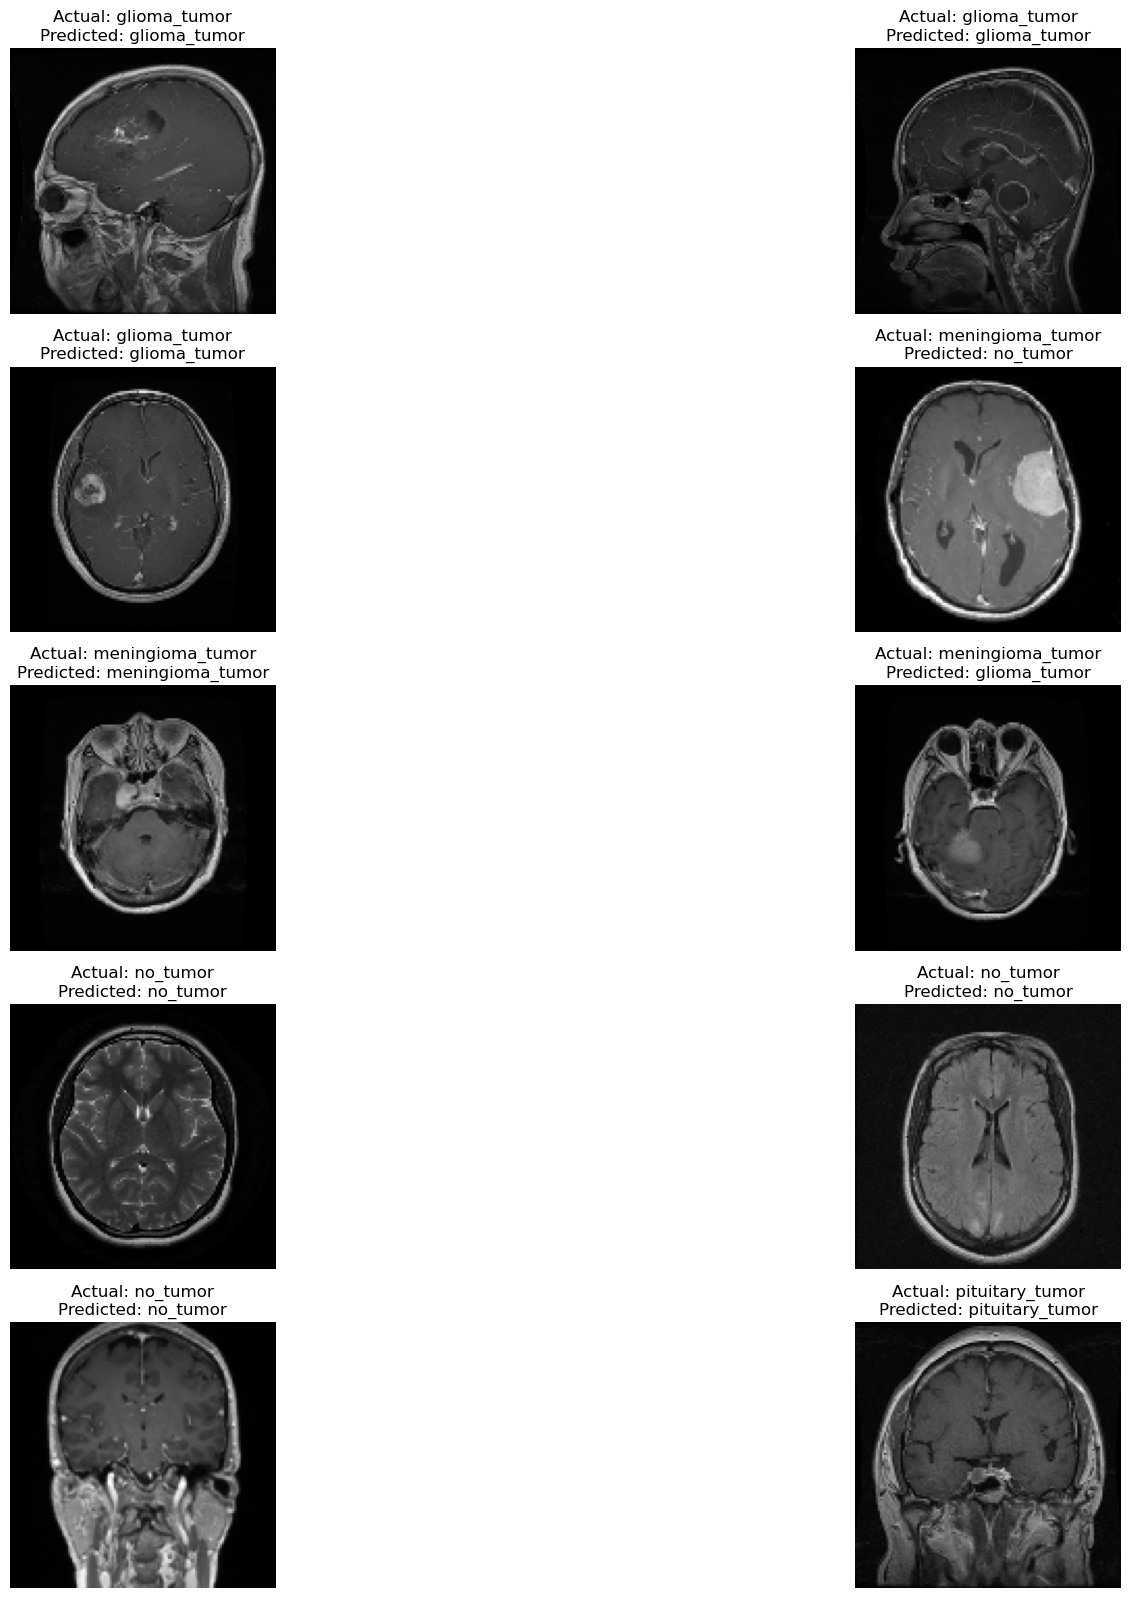

In [13]:
import matplotlib.pyplot as plt
import os

# Function to display images, actual labels, and predictions
def display_images_and_predictions_svm(model, image_paths, num_images=10):
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        # Load image
        image_path = image_paths[i]
        image = load_img(image_path, target_size=(128, 128))  # Resize the image to (128, 128)
        image_array = img_to_array(image)  # Convert image to numpy array
        image_flatten = image_array.flatten().reshape(1, -1)  # Flatten the image for SVM

        # Get actual label from the file path
        actual_label = os.path.basename(os.path.dirname(image_path))

        # Predict the class
        prediction = model.predict(image_flatten)
        predicted_label = class_names[int(prediction[0])]

        # Display the image, actual label, and predicted label
        plt.subplot(5, 2, i + 1)
        plt.imshow(image)
        plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
        plt.axis('off')

    plt.show()

# Collect 10 test images and their paths for visualization
test_images = []
for class_name in class_names:
    label_dir = os.path.join(base_dir, class_name)
    images = [os.path.join(label_dir, img) for img in os.listdir(label_dir)[:3]]  # Adjust to pick first 3 images from each class
    test_images.extend(images)

# Display images, actual labels, and their predictions
display_images_and_predictions_svm(svm, test_images)


In [12]:
# Perform cross-validation to get a more reliable estimate of model performance
cv_scores = cross_val_score(svm, data, labels, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")

Cross-validation accuracy scores: [0.82055749 0.78919861 0.83797909 0.82404181 0.83449477]
Mean cross-validation accuracy: 0.8212543554006968
Standard deviation of cross-validation accuracy: 0.017267612116186593
